# BNN on Pynq

This notebook covers how to use Binary Neural Networks on Pynq. 
It shows an example of image recognition with a binarized neural network inspired at VGG-16, featuring 6 convolutional layers, 3 max pool layers and 3 fully connected layers


## 1. Import the package

In [1]:
import bnn

## 3. Instantiate a Classifier

Creating a classifier will automatically download the correct bitstream onto device and load the weights trained on the specified dataset. Passing a runtime attribute will allow to choose between hardware accelerated or pure software inference.

Use `CnvClassifier(network,parameters,runtime)` for CNV network topology:

In [2]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,'cifar10',bnn.RUNTIME_HW)
sw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,'cifar10',bnn.RUNTIME_SW)

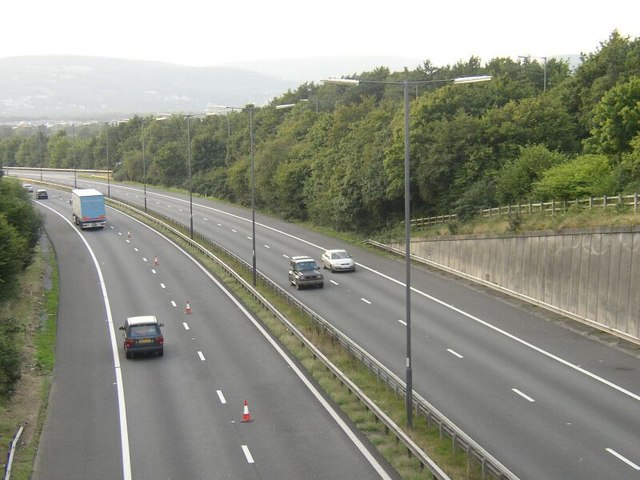

In [3]:
from PIL import Image
import numpy as np

im = Image.open('/home/xilinx/jupyter_notebooks/bnn/pictures/motorway.jpg')
im 

In [4]:
images = []
bounds = []
for s in [32, 64]:
    stride =  s // 2
    x_tiles = im.width // stride
    y_tiles = im.height // stride
    
    for j in range(y_tiles):
        for i in range(x_tiles):
            bound = (stride * i, stride * j, stride * i + s, stride * j + s)
            if bound[2] <= im.width and bound[3] < im.height:
                c = im.crop(bound)
                images.append(c)
                bounds.append(bound)

print(len(images))

1339


Next the set of images are passed through the classifier. Note how the rate of images is 3 times greater than for single image classification. Once the classes are returned, numpy can quickly find all of the indicies of tiles which have matched as cars.

In [5]:
results = hw_classifier.classify_images(images)
cars = results == 1
indicies = cars.nonzero()[0]

Inference took 440664.01 microseconds, 329.10 usec per image
Classification rate: 3038.60 images per second


To visualise the output we can draw the bounds of each matched rectangle on the original image.

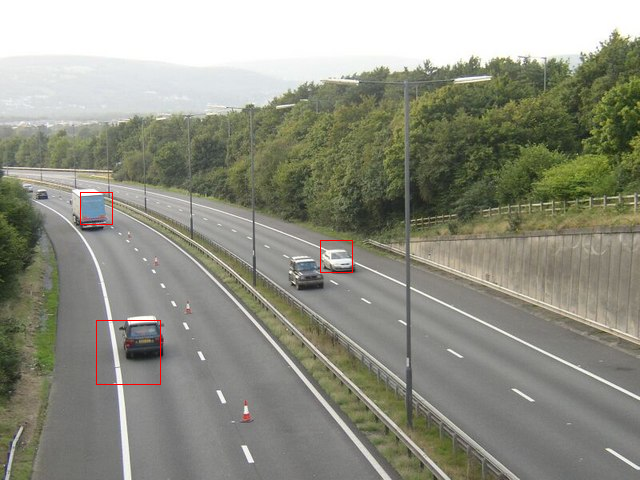

In [6]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)
for i in indicies:
    draw.rectangle(bounds[i], outline='red')

im

## 8. Reseting the device

In [16]:
from pynq import Xlnk

xlnk = Xlnk()
xlnk.xlnk_reset()